# Análisis de Datos (Semana 4)
## María José Fonseca Vázquez

Elegí el archivo $\textit{prison report}$. 

##### Preguntas a responder:

* ¿Cuál es el país -por continente- con mayor número promedio de prisioneros?
* ¿Cuál es el continente con mayor tasa promedio de prisioneros?
* ¿Qué subregión de dicho continente tiene la mayor cantidad de prisioneros?
* ¿Cuál es el país en ese continente con la mayor número de prisioneros?
* ¿Cuáles son los 5 países alrededor del mundo con mayor tasa de prisioneros?
* ¿Cómo ha aumentado la tasa de prisioneros a nivel mundial con el paso de los años?
* ¿Cuál ha sido el país con mayor cantidad de prisioneros para cada uno de los años?
* ¿Cuál ha sido el país con menor cantidad de prisioneros para cada uno de los años?
* ¿En qué año México tuvo mayor cantidad de prisioneros?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

In [228]:
p_rates = pd.read_excel('prison_report.xlsx', header = 0)
p_rates

,Region,Sub Region,Countries,Year,Count,Rate
0,Asia,Southern Asia,Afghanistan,2004,5262.0,21.816844
1,Asia,Southern Asia,Afghanistan,2006,7706.0,29.760422
2,Asia,Southern Asia,Afghanistan,2007,10590.0,39.786913
3,Asia,Southern Asia,Afghanistan,2008,12500.0,45.797559
4,Asia,Southern Asia,Afghanistan,2010,18283.0,63.475659
...,...,...,...,...,...,...
2309,Africa,Eastern Africa,Zimbabwe,2012,16900.0,114.881381
2310,Africa,Eastern Africa,Zimbabwe,2013,16902.0,112.272033
2311,Africa,Eastern Africa,Zimbabwe,2014,17484.0,113.446462
2312,Africa,Eastern Africa,Zimbabwe,2015,18857.0,119.518673


¿Cuál es el país -por continente- con mayor número promedio de prisioneros?

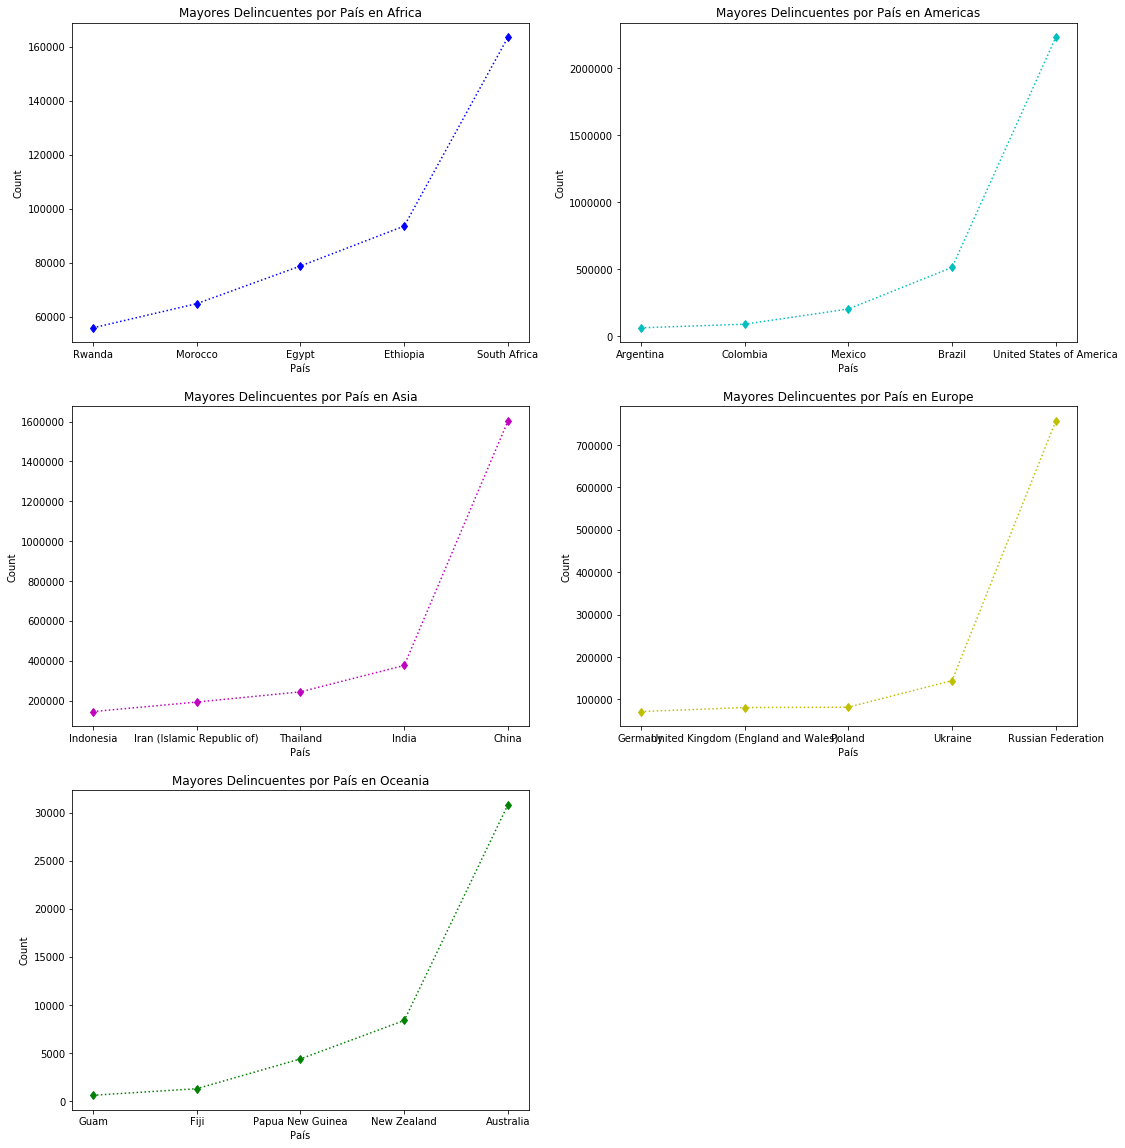

In [271]:
conts = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
color = ['bd', 'cd', 'md', 'yd', 'gd']
#CountConts = p_rates.groupby('Region').sum()
#CountConts = CountConts.reset_index()
#CountConts
i = 1
fig= plt.figure(figsize=(18,20))
for continent in conts:
    CountConts = p_rates[p_rates.Region == continent]
    CountConts = CountConts.groupby('Countries').mean()
    CountConts = CountConts.reset_index()
    CountConts = CountConts.sort_values('Count', ascending=True).tail()
    #print(CountConts)
    plt.subplot(3, 2, i)
    plt.plot(CountConts.Countries, CountConts.Count, color[i-1], linestyle = 'dotted', alpha=1)
    plt.xlabel('País')
    plt.ylabel('Count')
    plt.title('Mayores Delincuentes por País en ' + continent)
    i = i+1
    
plt.savefig('MaxDelCont')

¿Cuál es el continente con mayor tasa promedio de prisioneros?

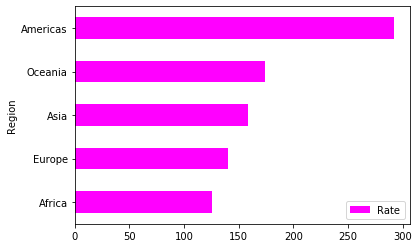

In [272]:
continents = p_rates.groupby('Region').mean()
continents = continents.reset_index()
continents = continents.sort_values('Rate', ascending=True)
ax = continents.plot.barh(x='Region', y='Rate', color = 'magenta')

#plt.title('Tasa de Prisioneros Promedio por Continente')
#plt.plot(continents.Region, continents.Rate, color = 'c', alpha = .6)
#plt.xlabel('Continente')
#plt.ylabel('Prisioneros totales')
plt.savefig('Continentes')

¿Qué subregión de dicho continente tiene la mayor cantidad de prisioneros?

Porcentaje de tasas de prisioneros por regiones en América


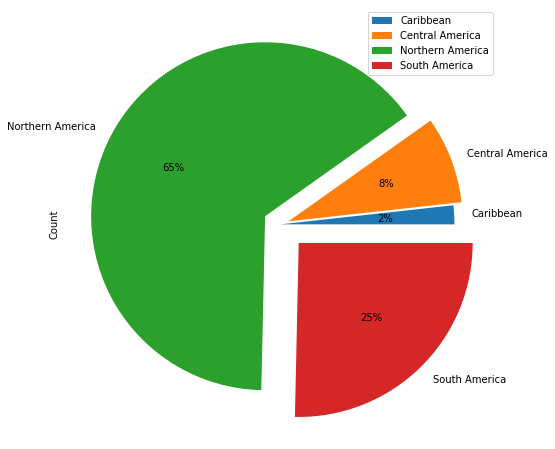

In [283]:
Americas = p_rates[p_rates['Region'] == 'Americas']
Americas = Americas.groupby('Sub Region').sum()
Americas = Americas.reset_index()
Americas
Americas['Count'].plot(kind='pie', subplots=True, figsize=(8, 8), labels = Americas['Sub Region'], 
                      explode = (0,0.05,0.1,0.15),autopct='%1.0f%%')
plt.legend()
plt.savefig('Americas')
print('Porcentaje de tasas de prisioneros por regiones en América')
#p_rates[p_rates['Sub Region'] == 'Caribbean']

¿Cuál es el país en esa región con la mayor cantidad de prisioneros?

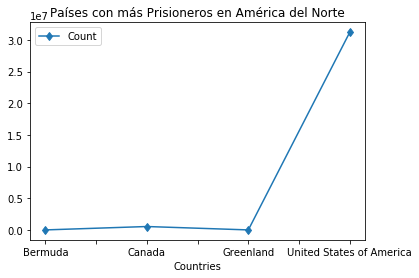

In [290]:
MaxCountCountry = p_rates[p_rates['Region'] == 'Americas']
MaxCountCountry = MaxCountCountry[MaxCountCountry['Sub Region'] == 'Northern America'] 
MaxCountCountry = MaxCountCountry.groupby('Countries').sum()
MaxCountCountry = MaxCountCountry.reset_index()
ax = MaxCountCountry.plot(x='Countries', y='Count', marker = 'd')
MaxCountCountry
plt.title('Países con más Prisioneros en América del Norte')
plt.savefig('AmericaDelNorte')

¿Cuáles son los 5 países alrededor del mundo con mayor número de prisioneros?

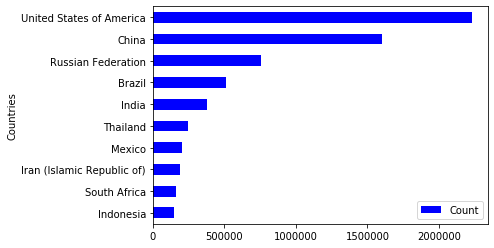

In [295]:
CountryWorldMax = p_rates.groupby('Countries').mean()
CountryWorldMax = CountryWorldMax.reset_index()
CountryWorldMax = CountryWorldMax.sort_values('Count', ascending=True).tail(10)
ax = CountryWorldMax.plot.barh(x='Countries', y='Count', color = 'blue')
plt.savefig('WorldCountries')

¿Cómo ha aumentado la tasa de prisioneros a nivel mundial con el paso de los años?

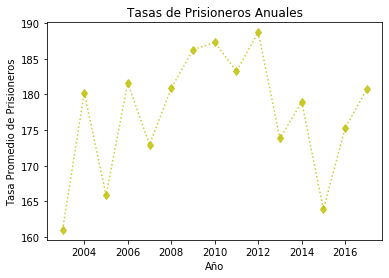

In [297]:
years = []
y_rates = [] 
for i in range(2003, 2018):
    years.append(i)
    y_rates.append(p_rates[p_rates.Year == i].Rate.mean())
plt.plot(years, y_rates, "yd", linestyle = 'dotted',alpha = .8)
plt.title('Tasas de Prisioneros Anuales')
plt.xlabel('Año')
plt.ylabel('Tasa Promedio de Prisioneros')
plt.savefig('TasaAnualMundial')

¿Cuál ha sido el país con mayor cantidad de prisioneros para cada uno de los años?

,Año,País con más prisioneros
0,2003,United States of America
1,2004,United States of America
2,2005,United States of America
3,2006,United States of America
4,2007,United States of America
5,2008,United States of America
6,2009,United States of America
7,2010,United States of America
8,2011,United States of America
9,2012,United States of America


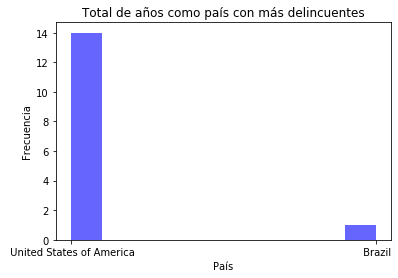

In [372]:
YearCountriesMax = []
for i in range(2003, 2018):
    y_rates_country = p_rates[p_rates.Year == i]
    y_rates_country.groupby('Countries').sum()
    y_rates_country.reset_index()
    y_rates_country = pd.DataFrame(y_rates_country) 
    #YearCountriesMax.append(df2) 
    YearCountriesMax.append(y_rates_country.Countries[y_rates_country['Count'] == 
                            y_rates_country.Count.max()].to_string(index=False))
    
y_rates_country = pd.DataFrame(years, columns=['Año'])
y_rates_country['País con más prisioneros'] = YearCountriesMax
y_rates_country

plt.style.use('seaborn-deep')
plt.hist(y_rates_country['País con más prisioneros'], color = 'b', alpha = .6)
plt.title('Total de años como país con más delincuentes')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.savefig('MasPrisioneos')
y_rates_country

¿Cuál ha sido el país con menor cantidad de prisioneros para cada uno de los años?

,Año,País con menos prisioneros
0,2003,Faroe Islands
1,2004,Gibraltar
2,2005,Nauru
3,2006,Faroe Islands
4,2007,Tuvalu
5,2008,Faroe Islands
6,2009,Holy See
7,2010,Holy See
8,2011,Holy See
9,2012,Holy See


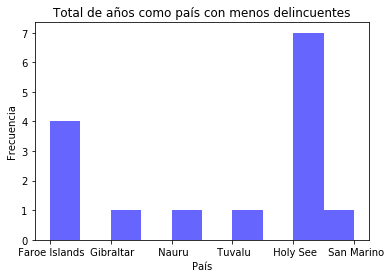

In [370]:
YearCountriesMin = []
for i in range(2003, 2018):
    y_rates_country = p_rates[p_rates.Year == i]
    y_rates_country.groupby('Countries').sum()
    y_rates_country.reset_index()
    y_rates_country = pd.DataFrame(y_rates_country) 
    #YearCountriesMax.append(df2) 
    YearCountriesMin.append(y_rates_country.Countries[y_rates_country['Count'] == 
                            y_rates_country.Count.min()].to_string(index=False))
    
y_rates_country = pd.DataFrame(years, columns=['Año'])
y_rates_country['País con menos prisioneros'] = YearCountriesMin
y_rates_country

plt.style.use('seaborn-deep')
plt.hist(y_rates_country['País con menos prisioneros'], color = 'b', alpha = .6)
plt.title('Total de años como país con menos delincuentes')
plt.xlabel('País')
plt.ylabel('Frecuencia')
plt.savefig('MenosPrisioneos')
y_rates_country

¿En qué año México tuvo mayor cantidad de prisioneros?

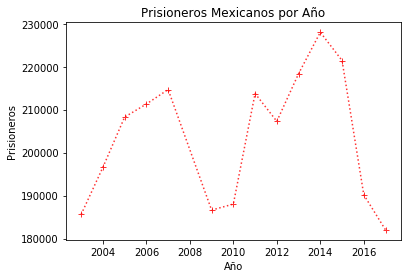

In [306]:
Mexico = p_rates[p_rates.Countries == 'Mexico']
plt.plot(Mexico.Year, Mexico.Count, "r+", linestyle = 'dotted',alpha = .8)
plt.title('Prisioneros Mexicanos por Año')
plt.xlabel('Año')
plt.ylabel('Prisioneros')
plt.savefig('Mexico')